In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('../data/titanic.csv')

print(f'Number of Rows {df.shape[0]} and Number of col {df.shape[1]}')


Number of Rows 891 and Number of col 12


In [107]:
print('fist few rows display \n')
df.head(5)

fist few rows display 



,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [108]:
print(f'Missing Values :-')
df.isnull().sum()

Missing Values :-


passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [109]:
df.drop(['passenger_id','name'],axis=1,inplace=True)
df.head(2)

,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1


<Axes: xlabel='p_class', ylabel='count'>

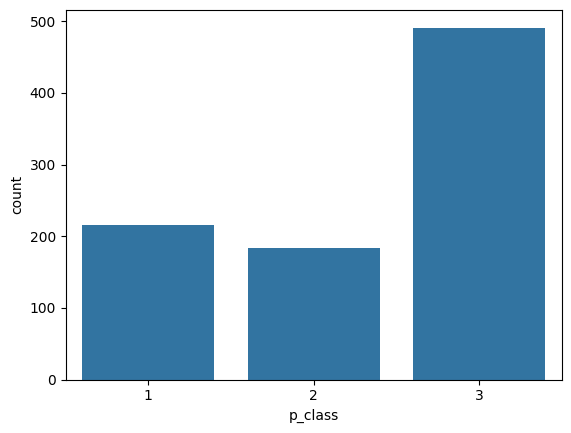

In [110]:
sns.barplot(df['p_class'].value_counts())

<Axes: xlabel='survived', ylabel='count'>

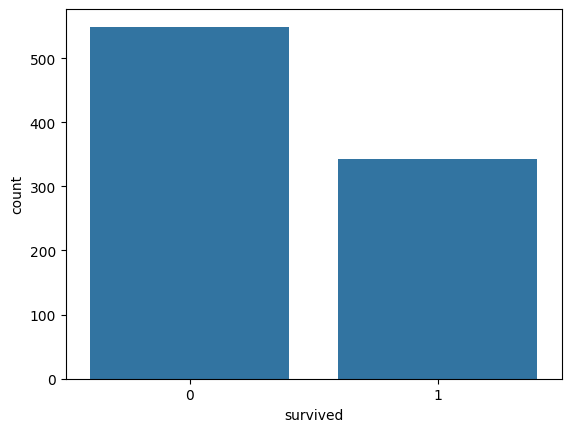

In [111]:
sns.barplot(df['survived'].value_counts())

([<matplotlib.patches.Wedge at 0x16a1dc210>,
 [Text(-0.4919454315896098, 0.9838646717603559, ''),
  Text(0.49194551760179267, -0.9838646287531149, '')])

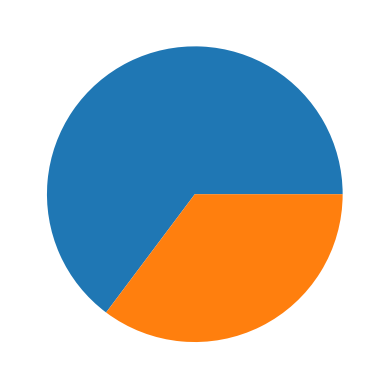

In [112]:
plt.pie(df['sex'].value_counts())

<Axes: xlabel='age', ylabel='Count'>

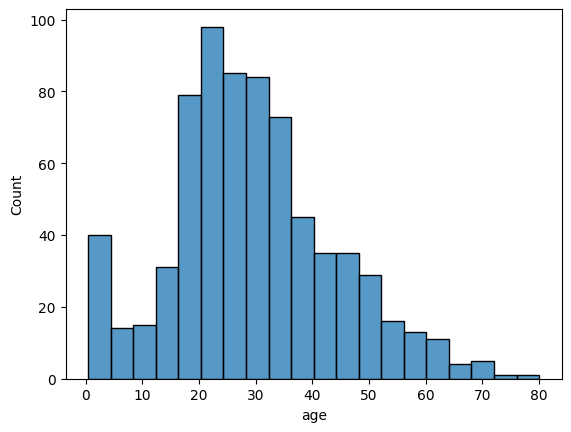

In [113]:
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

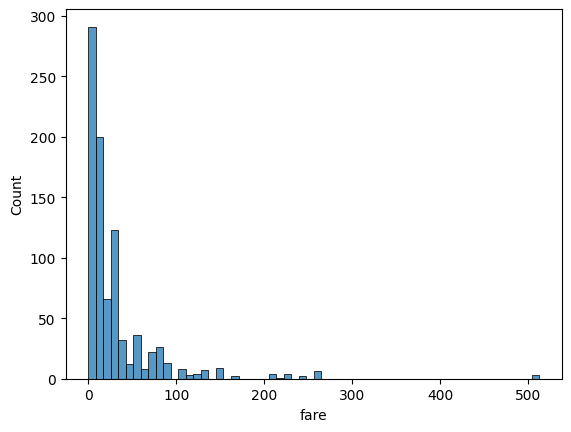

In [114]:
sns.histplot(df['fare'])

In [115]:
df.describe()

,p_class,age,sib_sp,parch,fare,survived
count,891.000000,714.000000,891.000000,891.000000,882.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.302838,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.912534,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [116]:
#IQR

Q1,Q3 = df['fare'].quantile([0.05,0.95])

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR


In [117]:
upper,lower

(272.0510374999996, -151.67062249999978)

In [118]:
df[df['fare'] >= upper]

,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
258,1,female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,1,male,35.0,0,0,PC 17755,512.3292,B101,C,1


In [119]:
df['fare'].clip(upper=upper,inplace=True)


In [120]:
df[df['fare'] > upper]

,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived


In [121]:
# Handel Missing Value

df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)

In [122]:
df['cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: cabin, dtype: object

In [123]:
df['cabin'].fillna(df['cabin'].mode()[2],inplace=True)

In [124]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [125]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [126]:
df['p_class'] = df['p_class'].apply(lambda x:str(x))

In [127]:
df['sib_sp'].value_counts()

sib_sp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [128]:
df['parch'].value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p_class   891 non-null    object 
 1   sex       891 non-null    object 
 2   age       891 non-null    float64
 3   sib_sp    891 non-null    int64  
 4   parch     891 non-null    int64  
 5   ticket    891 non-null    object 
 6   fare      891 non-null    float64
 7   cabin     891 non-null    object 
 8   embarked  891 non-null    object 
 9   survived  891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [130]:
x = df.drop('survived',axis=1)
y = df['survived']

num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

In [131]:
transfer = ColumnTransformer(
    [
        ('encod',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_feature),
        ('scale',StandardScaler(),num_feature)
    ]
)

transfer

ColumnTransformer(transformers=[('encod',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['p_class', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['age', 'sib_sp', 'parch', 'fare'], dtype='object'))])

In [132]:
pipe = Pipeline([
    ('transfer',transfer),
    ('GNB',GaussianNB())
])

pipe

Pipeline(steps=[('transfer',
                 ColumnTransformer(transformers=[('encod',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['p_class', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['age', 'sib_sp', 'parch', 'fare'], dtype='object'))])),
                ('GNB', GaussianNB())])

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f'Test Accuracy is {acc}')

Test Accuracy is 0.48880597014925375


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.18      0.30       157
           1       0.44      0.92      0.60       111

    accuracy                           0.49       268
   macro avg       0.60      0.55      0.45       268
weighted avg       0.63      0.49      0.42       268



<Axes: >

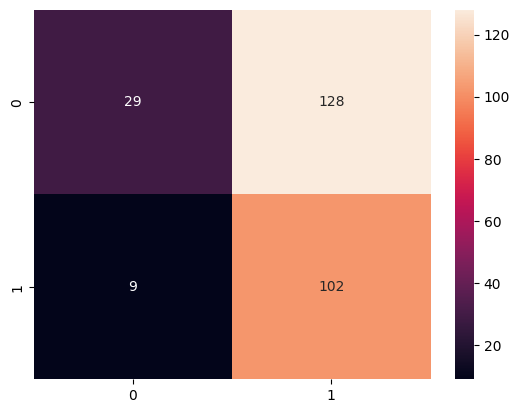

In [135]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

Select the features `(p_class, sex, age, fare)` and the target variable `(survived)` for modeling.

In [136]:
x = df[['p_class', 'sex', 'age', 'fare']]
y = df['survived']

In [137]:
num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

transfer = ColumnTransformer(
    [
        ('encod',OneHotEncoder(drop='first'),cat_feature),
        ('scale',StandardScaler(),num_feature)
    ]
)

pipe = Pipeline([
    ('transfer',transfer),
    ('GNB',GaussianNB())
])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f'Test Accuracy is {acc}')

Test Accuracy is 0.7835820895522388


In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       157
           1       0.73      0.75      0.74       111

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



<Axes: >

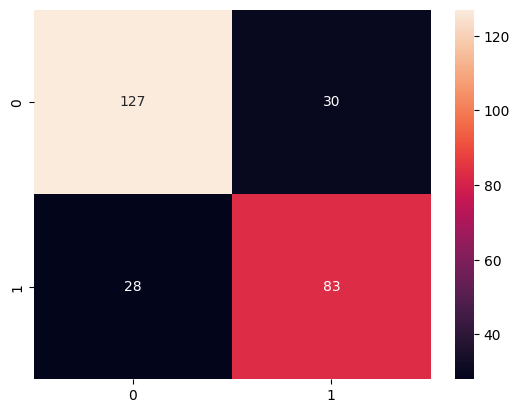

In [139]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')